# Penyiapan data dan clustering k-means untuk segmentasi customer mall serta pemeriksaan kualitas cluster menggunakan elbow method dan koefisien Silhouette

Oleh: Liptia Venica

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
#Import library k-Means
from sklearn.cluster import KMeans

## Data Preparation

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Kuliah/Semester Ganjil 2023 2024/Machine Learning/Praktikum M7/Mall_Customers.csv")

In [ ]:
# Pilih fitur-fitur (4 atribut) yang akan dikelompokkan (tidak mengikutsertakan atribut CustomerID)
data_mall_4kol = df[['Genre', 'Age',	'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# let's look through our data
data_mall_4kol.head()
# display shape of data
print("Shape:",data_mall_4kol.shape)
# check for any null value
data_mall_4kol.isna().sum()

In [ ]:
# let's rename some columns name for our convinence
data_mall_4kol.columns = ['gender', 'age', 'income', 'spending']
data_mall_4kol.head()

In [ ]:
# get information about data
data_mall_4kol.info()

In [ ]:
data_mall_4kol['gender'] = data_mall_4kol.gender.map({'Female':0, 'Male':1})
data_mall_4kol.head()

<ipython-input-14-9ebe226e9e91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mall_4kol['gender'] = data_mall_4kol.gender.map({'Female':0, 'Male':1})


,gender,age,income,spending
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
# Buat numpy array X dari dataframe data_mall_4kol
x = np.array(data_mall_4kol.values)
x

## K-Means Clustering
Pada tahap ini dilakukan clustering pada data mall customer menggunakan nilai K yang berbeda beda kemudian dihitung nilai intertia dan koefisien silhouettenya untuk keperluan evaluasi (mengetahui kualitas cluster yang dihasilkan dari tiap-tiap jumlah cluster (k) yang digunakan)

In [ ]:
#clustering kmeans dengan pemeriksaan kualitas hasil cluster menggunakan elbow method dan koefisien silhouette
#clustering kmeans dilakukan dengan menjalankan algoritmanya menggunakan nilai k 2 hingga 15 (konfigurasi secara manual)
inertia = []
silhouette_coefficients = []
K = range(2,16)
for k in K:
    kmeans_model = KMeans(n_clusters=k).fit(x)
    inertia.append(kmeans_model.inertia_)
    score = silhouette_score(x, kmeans_model.labels_,  metric='euclidean')
    silhouette_coefficients.append(score)

#just in case akan menggunakan centroid yang ditentukan secara manual:
#contoh:
#cluster_centers = np.array([[1, 1], [0, 0]])
#kmeans_model = KMeans(n_clusters=2, init=cluster_centers, n_init=1)

In [ ]:
kmeans_model

KMeans(n_clusters=15)

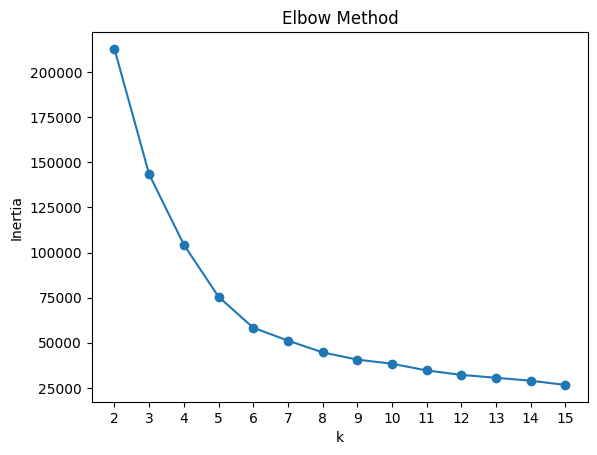

In [ ]:
#visualisasi hasil elbow method
plt.plot(K, inertia, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 16))
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

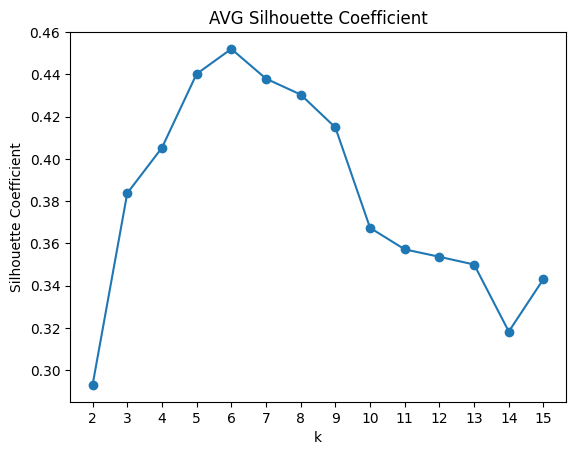

In [ ]:
#visualisasi hasil perhitungan koefisien Silhouette
plt.plot(K, silhouette_coefficients, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 16))
plt.ylabel("Silhouette Coefficient")
plt.title("AVG Silhouette Coefficient")
plt.show()

## Analisis Pola Cluster

In [ ]:
#Misal, dari hasil pemeriksaan kualitas cluster, diperoleh nilai K terbaik adalah 6, selanjutnya
#Lakukan clustering (fit) terhadap x dgn jumlah cluster = 6
kmeans_model = KMeans(n_clusters=6).fit(x)

# Simpan hasil clustering berupa nomor klaster tiap objek/rekord
cluster_label = kmeans_model.labels_

# Simpan hasil clustering berupa centroid (titik pusat) tiap kelompok
cluster_centroids = kmeans_model.cluster_centers_

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Visualisasi Hasil Cluster dengan Scatterplot
visualisasi scatterplot digunakan akan memvisualisasikan sebaran atribut2 di cluster2 jika clustering diterapkan pada dataset dengan 2 atribut

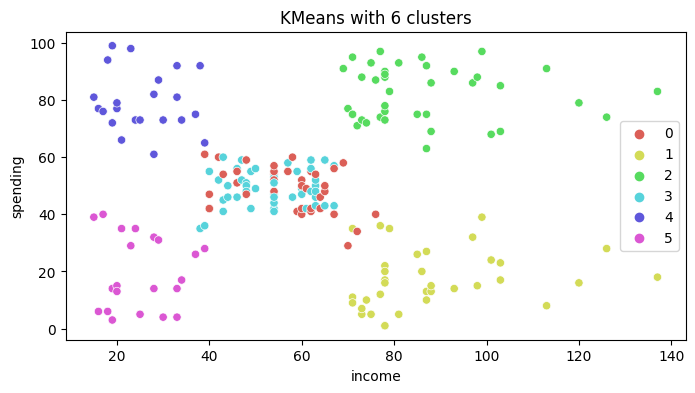

In [ ]:
plt.figure(figsize = (8,4))
sns.scatterplot(x=data_mall_4kol['income'], y=data_mall_4kol['spending'], hue=cluster_label, palette=sns.color_palette('hls',6))
plt.title('KMeans with 6 clusters')
plt.show()

### Visualisasi Hasil Cluster dengan boxplot
visualisasi boxplot digunakan akan memvisualisasikan sebaran atribut2 di cluster2 jika clustering diterapkan pada dataset dengan multiple atribut > 2

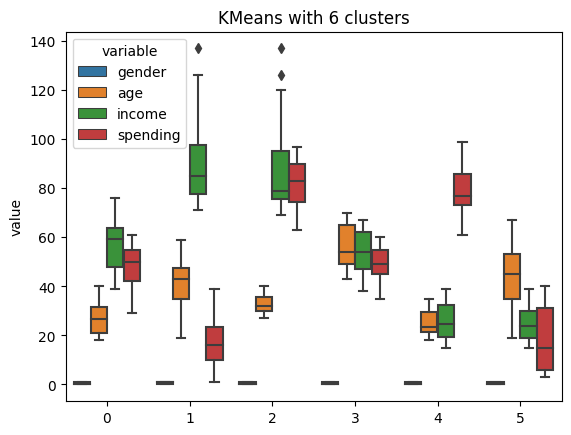

In [ ]:
#dataset harus diconvert terlebih dahulu dari wide-form dataframe menjadi long-form
long_form_data_mall_4kol = pd.melt(data_mall_4kol)

#karena datasetnya sudah dalam bentuk long-form, array yg menyimpan label kelas juga harus dimodifikasi
repeated_label = np.append(cluster_label,cluster_label)
repeated_label = np.append(repeated_label,repeated_label)

sns.boxplot(x=repeated_label, y="value", hue="variable", data=long_form_data_mall_4kol)
plt.title('KMeans with 6 clusters')
plt.show()


#referensi jenis2 visualisasi hasil clustering
#https://blog.exploratory.io/visualizing-k-means-clustering-results-to-understand-the-characteristics-of-clusters-better-b0226fb3dd10